# **Titanic passenger survival prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import seaborn as sns


**1.Reading Data**

In [2]:
data=pd.read_csv("tested.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
data.shape

(418, 12)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**2.Data Cleaning**

In [6]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
print(data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
age_mode=data['Age'].mode()[0]
fare_mean=data['Fare'].mean()
data['Age']=data['Age'].fillna(age_mode)
data['Fare']=data['Fare'].fillna(fare_mean)
data['Age']=data['Age'].astype(int)
data['Fare']=data['Fare'].astype(int)
df=data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [9]:
print(df.isna().sum())
print(df.dtypes)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Survived     int64
Pclass       int64
Sex         object
Age          int32
SibSp        int64
Parch        int64
Fare         int32
Embarked    object
dtype: object


In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34,0,0,7,Q
1,1,3,female,47,1,0,7,S
2,0,2,male,62,0,0,9,Q
3,0,3,male,27,0,0,8,S
4,1,3,female,22,1,1,12,S


**3.Data Visualization**

In [11]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

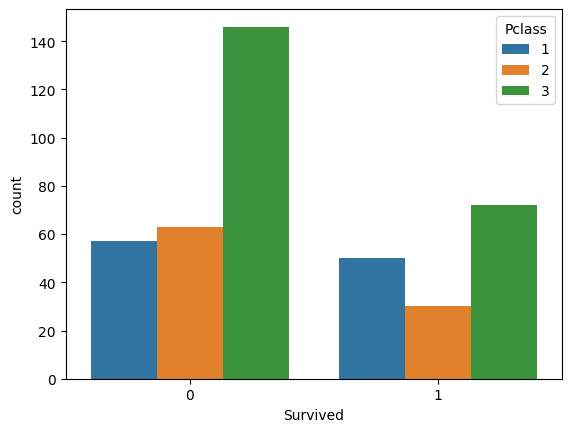

In [12]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])

In [13]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

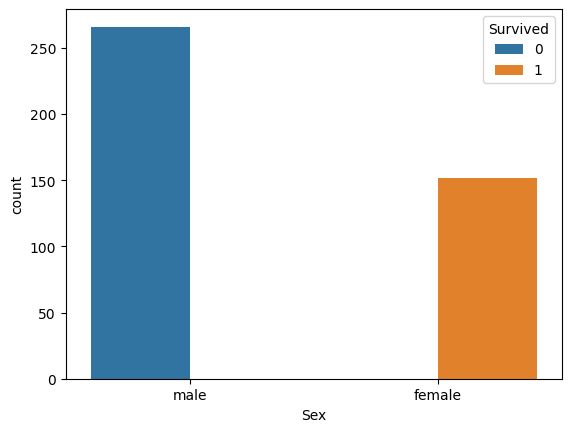

In [14]:
sns.countplot(x=df['Sex'],hue=df['Survived'])

**4.Data Processing**

In [15]:
from sklearn.preprocessing import LabelEncoder
lE=LabelEncoder()

df['Sex']=lE.fit_transform(df['Sex'])
df['Sex'].unique()
#1=male
#0=Female

array([1, 0])

In [16]:
df['Sex'],df['Survived']

(0      1
 1      0
 2      1
 3      1
 4      0
       ..
 413    1
 414    0
 415    1
 416    1
 417    1
 Name: Sex, Length: 418, dtype: int32,
 0      0
 1      1
 2      0
 3      0
 4      1
       ..
 413    0
 414    1
 415    0
 416    0
 417    0
 Name: Survived, Length: 418, dtype: int64)

In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34,0,0,7,Q
1,1,3,0,47,1,0,7,S
2,0,2,1,62,0,0,9,Q
3,0,3,1,27,0,0,8,S
4,1,3,0,22,1,1,12,S
...,...,...,...,...,...,...,...,...
413,0,3,1,21,0,0,8,S
414,1,1,0,39,0,0,108,C
415,0,3,1,38,0,0,7,S
416,0,3,1,21,0,0,8,S


**5.Model building**

In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34,0,0,7,Q
1,1,3,0,47,1,0,7,S
2,0,2,1,62,0,0,9,Q
3,0,3,1,27,0,0,8,S
4,1,3,0,22,1,1,12,S
...,...,...,...,...,...,...,...,...
413,0,3,1,21,0,0,8,S
414,1,1,0,39,0,0,108,C
415,0,3,1,38,0,0,7,S
416,0,3,1,21,0,0,8,S


In [19]:
X=df[['Sex']]
Y=df['Survived']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [21]:
Y_train

165    1
363    0
292    0
130    0
134    0
      ..
54     0
342    0
395    1
56     0
139    0
Name: Survived, Length: 313, dtype: int64

In [22]:
log=LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [23]:
pred=log.predict(X_test)

In [24]:
pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [25]:

import warnings
warnings.filterwarnings("ignore")
res=log.predict([[0]])
if(res==0):
    print("Not Survived")
else:
    print("Survived")

Survived


In [26]:
score=log.score(X_train,Y_train)
score

1.0

In [27]:
mse=metrics.mean_squared_error(Y_test,pred)
mse

0.0

In [28]:
score=log.score(X_test,Y_test)
score

1.0

In [29]:
acc=round(accuracy_score(pred,Y_test)*100,2)

In [30]:
acc

100.0

In [31]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,21,0,0,A.5. 3236,8,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,21,0,0,359309,8,NaN,S
